<a href="https://colab.research.google.com/github/Hubercorp/scraper/blob/main/TIJ_SFHH_Graph_Mining_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/tij_InVS.dat', header = 1)
data.columns = ['tij']
data

,tij
0,29300 181 826
1,29780 79 181
2,30000 150 196
3,30020 21 150
4,30060 21 205
...,...
9820,1015380 150 601
9821,1015400 150 601
9822,1015440 150 601
9823,1016420 150 601


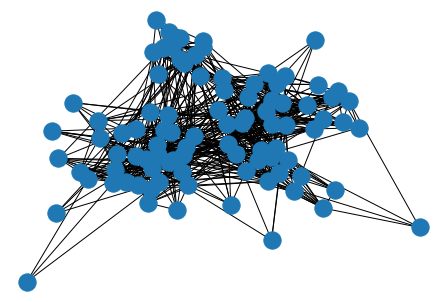

In [ ]:
def load_sociopatterns_network():
    df = pd.DataFrame(data.tij.str.split(' ',3).tolist(),columns=['t','i','j'])
    #df['weigth'] = '1'
    G = nx.Graph()
    for row in df.iterrows():
        p1 = row[1]["i"]
        p2 = row[1]["j"]
        if G.has_edge(p1, p2):
            G.edges[p1, p2]["weight"] += 1
        else:
            G.add_edge(p1, p2, weight=1)

    for n in sorted(G.nodes()):
        G.nodes[n]["order"] = float(n)

    return G

G = load_sociopatterns_network()
nx.draw(G)

In [1]:
def drawGraph (G, pos = None):
    plt.figure (figsize=(16,16))
    if not pos:
        pos = nx.spring_layout(G)
    nx.draw(G, pos)
    nx.draw_networkx_labels(G, pos) 
    plt.show()
    
drawGraph(G)

NameError: ignored

In [ ]:
#nbr nodes & edges 
len(G.nodes()), len(G.edges())

(92, 753)

In [ ]:
#degré de centralité
dcs = pd.Series(nx.degree_centrality(G))
dcsasc = dcs.sort_values(ascending=False)
dcsasc

804    0.483516
311    0.417582
95     0.351648
80     0.340659
134    0.329670
         ...   
210    0.043956
938    0.043956
791    0.043956
87     0.043956
272    0.032967
Length: 92, dtype: float64

In [ ]:
#centralité 2
dbs = pd.Series(nx.betweenness_centrality(G))
dbs

181    0.006282
826    0.029374
79     0.012045
150    0.020070
196    0.010118
         ...   
255    0.017969
213    0.000465
791    0.000193
743    0.002327
87     0.000414
Length: 92, dtype: float64

In [ ]:
#noeud avec le plus de liens
def rank_ordered_neighbors(G):

    s = pd.Series({n: len(list(G.neighbors(n))) for n in G.nodes()})
    return s.sort_values(ascending=False)

rank_ordered_neighbors(G)


804    44
311    38
95     32
80     31
134    30
       ..
210     4
938     4
791     4
87      4
272     3
Length: 92, dtype: int64

# 2-degree_distribution

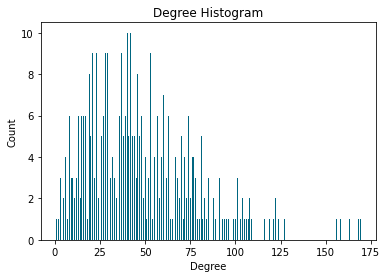

In [ ]:
import collections
# extract the degree sequence
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
#print("Degree sequence", degree_sequence)

# compute the number of nodes having a given centrality
degreeCount = collections.Counter(degree_sequence)
#print("degreeCount", degreeCount)

# spilt into two differents list the degree and the number of nodes having that degree
deg, cnt = zip(*degreeCount.items())
#print(deg, cnt)

# build and draw histogram
plt.bar(deg, cnt, width=0.5, color=(0, 0.4, 0.5, 1))

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

# 3-clustering_coefficient

In [ ]:
# compute and display the average clustering coefficient of the karate club graph
print(nx.average_clustering(G))

0.28172259003002936


# 4-configuration_model


In [ ]:
import community
plt.figure(figsize=((10,8))
           
partition = community.best_partition(G[0])
size = float(len(set(partition.values())))
pos = nx.kamada_kawai_layout(G[0])
count = 0
colors = ['red', 'blue', 'yellow', 'black',
          'brown', 'purple', 'green', 'pink']
for com in set(partition.values()):
    list_nodes = [nodes for
                  nodes in partition.keys()
                if partition[nodes] == com]
    nx.draw_networkx_nodes(G[0],
        pos, list_nodes, node_size = 20,
        node_color = colors[count])
    count = count + 1

nx.draw_networkx_edges(G[0], pos, alpha=0.2)

plt.plot(run_before, run_after, 'ro-')
plt.plot(walk_before, walk_after, 'bo-')
plt.show()

SyntaxError: ignored